In [ ]:
from astropy.io import fits
import numpy as np
from glob import glob 
import aplpy
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
def get_hdu(rootdir, filename, hdu_id=0):
    filename_full = glob(rootdir+filename)[0]
    print(filename_full)
    if hdu_id == 'all':
        hdu = fits.open(filename_full)
    else:
        hdu = fits.open(filename_full)[hdu_id]
    return(hdu)

galaxy = 'ngc628c'
galaxy_muse = 'ngc0628'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 
run_cleanup = True

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Take the anchored version, careful of name change in variable
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb        = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse            = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')
hdu_muse_ha         = hdu_muse['HA6562_FLUX']
hdu_muse_f555w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f555w.fits')
hdu_muse_f65Xn      = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s.fits' %narrowband_filter)
hdu_muse_f814w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f814w.fits')
hdu_hst_f555w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w.fits')
hdu_hst_f65Xn       = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s.fits' %narrowband_filter)
hdu_hst_f814w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w.fits')
hdu_hst_ha          = get_hdu(rootdir, 'hst_contsub/hdu_hst_an_ha.fits')
hdu_hst_ha_noan     = get_hdu(rootdir, 'hst_contsub/hdu_hst_ha.fits')
hdu_hst_an_cont     = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an_cont.fits' %narrowband_filter)
hdu_muse_contsub    = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s_contsub.fits' %narrowband_filter)
hdu_hst_f555w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_smre.fits')
hdu_hst_f65Xn_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_smre.fits' %narrowband_filter)
hdu_hst_f814w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_smre.fits')
hdu_hst_f555w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_an.fits') 
hdu_hst_f65Xn_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an.fits' %narrowband_filter) 
hdu_hst_f65Xn_anf   = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_anf.fits' %narrowband_filter) 
hdu_hst_f814w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_an.fits') 
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_hst_ha_crop     = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_crop.fits' %galaxy)
hdu_hst_ha_s_crop   = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_s_crop.fits' %galaxy)
hdu_hst_ha_si_crop  = get_hdu(rootdir,'hst_contsub/%s_hst_ha_si_crop.fits' %galaxy)
hdu_hst_ha_sic_crop = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_sic_crop.fits' %galaxy)

In [ ]:
ra, dec, size = 24.1721149, 15.7806457, 0.035
hdu_mask = fits.PrimaryHDU(np.isnan(hdu_hst_f555w_smre.data)*1, hdu_hst_f555w_smre.header)
bbox = dict(facecolor='whitesmoke',  alpha=0.95, boxstyle='round')

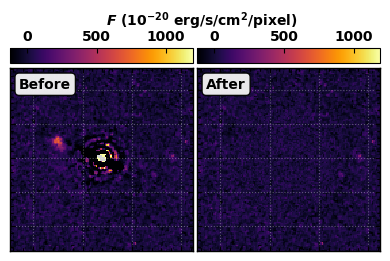

In [52]:
# Maps contsub

ra, dec, size = 24.1598399, 15.7730438, 0.0007435

hdus = [hdu_hst_ha_crop, hdu_hst_ha_s_crop]
# hdus = [hdu_muse_contsub, hdu_muse_contsub]


label = ['Before', 'After']

fig = plt.figure(figsize=(4, 4))

for i, hdu in enumerate(hdus):

    hdu.data[hdu.data==0] = np.nan
    ax = aplpy.FITSFigure(hdu, subplot=(1, 2, i+1), figure=fig)

    vmin, vmax = np.nanpercentile(hdu.data, (0.1, 99.9))
    ax.show_colorscale(vmin=vmin, vmax=vmax, cmap='inferno')

    ax.show_contour(hdu_mask, levels=[0], colors='black', zorder=0, lw=0.5)

    ax.recenter(ra, dec, size)
    ax.axis_labels.hide()
    ax.tick_labels.hide()

    ax.add_colorbar()
    ax.ticks.set_color('black')
    ax.colorbar.set_width(0.15)
    
    ax.add_label(0.05, 0.95, label[i],  ha='left', va='top', size=10, bbox = bbox, relative=True)

    ax.set_nan_color('lightgrey')

    ax_plot = fig.get_axes()[-2]
    ax_plot.grid(True, alpha=0.3, ls=':', color='white')

    # if i in [0]: #top row...
        # ax.colorbar.set_axis_label_text('$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)')

    ax.colorbar.set_location('top')
    axcbar = fig.get_axes()[-1]
    axcbar.xaxis.set_ticks_position('top')

    ax_cbar = fig.get_axes()[-1]
    ax_cbar.yaxis.set_ticks_position('both')

fig.tight_layout(h_pad=0, w_pad=0.3)

ax.add_label(-0.5, 1.32, '$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)', ha='left', va='top', relative=True)

fig.savefig('./%s_maps_s.pdf' %galaxy, bbox_inches='tight', dpi=300)  

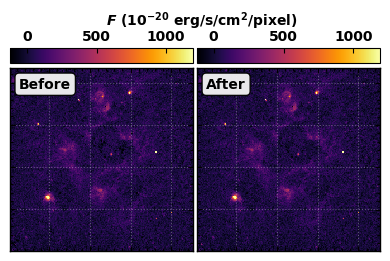

In [53]:
# Maps contsub

ra, dec, size = 24.1864307, 15.7834847, 0.0018030

hdus = [hdu_hst_ha_crop, hdu_hst_ha_si_crop]
# hdus = [hdu_muse_contsub, hdu_muse_contsub]


label = ['Before', 'After']

fig = plt.figure(figsize=(4, 4))

for i, hdu in enumerate(hdus):

    hdu.data[hdu.data==0] = np.nan
    ax = aplpy.FITSFigure(hdu, subplot=(1, 2, i+1), figure=fig)

    vmin, vmax = np.nanpercentile(hdu.data, (0.1, 99.9))
    ax.show_colorscale(vmin=vmin, vmax=vmax, cmap='inferno')

    ax.show_contour(hdu_mask, levels=[0], colors='black', zorder=0, lw=0.5)

    ax.recenter(ra, dec, size)
    ax.axis_labels.hide()
    ax.tick_labels.hide()

    ax.add_colorbar()
    ax.ticks.set_color('black')
    ax.colorbar.set_width(0.15)
    
    ax.add_label(0.05, 0.95, label[i],  ha='left', va='top', size=10, bbox = bbox, relative=True)

    ax.set_nan_color('lightgrey')

    ax_plot = fig.get_axes()[-2]
    ax_plot.grid(True, alpha=0.3, ls=':', color='white')

    # if i in [0]: #top row...
    #     ax.colorbar.set_axis_label_text('$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)')

    ax.colorbar.set_location('top')
    axcbar = fig.get_axes()[-1]
    axcbar.xaxis.set_ticks_position('top')

    ax_cbar = fig.get_axes()[-1]
    ax_cbar.yaxis.set_ticks_position('both')

fig.tight_layout(h_pad=0, w_pad=0.3)

ax.add_label(-0.5, 1.32, '$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)', ha='left', va='top', relative=True)

fig.savefig('./%s_maps_si.pdf' %galaxy, bbox_inches='tight', dpi=300)  

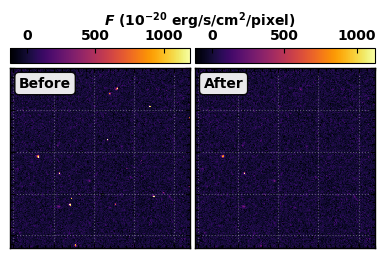

In [50]:
# Maps contsub

ra, dec, size = 24.1573629, 15.7773834, 0.0018030

hdus = [hdu_hst_ha_crop, hdu_hst_ha_sic_crop]
# hdus = [hdu_muse_contsub, hdu_muse_contsub]


label = ['Before', 'After']

fig = plt.figure(figsize=(4, 4))

for i, hdu in enumerate(hdus):

    hdu.data[hdu.data==0] = np.nan
    ax = aplpy.FITSFigure(hdu, subplot=(1, 2, i+1), figure=fig)

    vmin, vmax = np.nanpercentile(hdu.data, (0.1, 99.9))
    ax.show_colorscale(vmin=vmin, vmax=vmax, cmap='inferno')

    ax.show_contour(hdu_mask, levels=[0], colors='black', zorder=0, lw=0.5)

    ax.recenter(ra, dec, size)
    ax.axis_labels.hide()
    ax.tick_labels.hide()

    ax.add_colorbar()
    ax.ticks.set_color('black')
    ax.colorbar.set_width(0.15)
    
    ax.add_label(0.05, 0.95, label[i],  ha='left', va='top', size=10, bbox = bbox, relative=True)

    ax.set_nan_color('lightgrey')

    ax_plot = fig.get_axes()[-2]
    ax_plot.grid(True, alpha=0.3, ls=':', color='white')

    # if i in [0]: #top row...
    #     ax.colorbar.set_axis_label_text('$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)')

    ax.colorbar.set_location('top')
    axcbar = fig.get_axes()[-1]
    axcbar.xaxis.set_ticks_position('top')

    ax_cbar = fig.get_axes()[-1]
    ax_cbar.yaxis.set_ticks_position('both')

fig.tight_layout(h_pad=0, w_pad=0.3)

ax.add_label(-0.5, 1.32, '$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)', ha='left', va='top', relative=True)

fig.savefig('./%s_maps_sic.pdf' %galaxy, bbox_inches='tight', dpi=300)  